# FIFA 19 Complete player Dataset

This is the FIFA 19 Complete player Dataset wich I'm are going to explore and analize. 

With this Dataset, we will try to asnwer the following question:

1. Wich variable most influences  the player's rating?

## Import Libraries

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import normaltest, shapiro, anderson
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
import math
import warnings
from IPython.display import display, HTML
import statsmodels.api as sm
from sklearn.metrics import r2_score, mean_squared_error

warnings.filterwarnings('ignore')
%matplotlib inline

## File Management

In [2]:
# File opening

filepath = r'FIFA_DS\\'
df = pd.read_csv(filepath + 'data.csv')

## Dataframe Information

In [3]:
# First numbers of observations in dataset

df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [4]:
# Last numbers of observations in dataset

df.tail()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
18202,18202,238813,J. Lundstram,19,https://cdn.sofifa.org/players/4/19/238813.png,England,https://cdn.sofifa.org/flags/14.png,47,65,Crewe Alexandra,...,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,€143K
18203,18203,243165,N. Christoffersson,19,https://cdn.sofifa.org/players/4/19/243165.png,Sweden,https://cdn.sofifa.org/flags/46.png,47,63,Trelleborgs FF,...,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,€113K
18204,18204,241638,B. Worman,16,https://cdn.sofifa.org/players/4/19/241638.png,England,https://cdn.sofifa.org/flags/14.png,47,67,Cambridge United,...,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,€165K
18205,18205,246268,D. Walker-Rice,17,https://cdn.sofifa.org/players/4/19/246268.png,England,https://cdn.sofifa.org/flags/14.png,47,66,Tranmere Rovers,...,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,€143K
18206,18206,246269,G. Nugent,16,https://cdn.sofifa.org/players/4/19/246269.png,England,https://cdn.sofifa.org/flags/14.png,46,66,Tranmere Rovers,...,43.0,40.0,43.0,50.0,10.0,15.0,9.0,12.0,9.0,€165K


In [5]:
print("Shape of dataframe: ", df.shape)

Shape of dataframe:  (18207, 89)


In [6]:
# Find the total number of na values in dataframe

print("Total of na values in dataframe: ",df.isna().sum().sum())

Total of na values in dataframe:  76984


In [7]:
# Types of the dataframe

print("   ------ Types ------")
df.dtypes

   ------ Types ------


Unnamed: 0          int64
ID                  int64
Name               object
Age                 int64
Photo              object
                   ...   
GKHandling        float64
GKKicking         float64
GKPositioning     float64
GKReflexes        float64
Release Clause     object
Length: 89, dtype: object

In [8]:
print('Dataframe Columns: ', df.columns)

Dataframe Columns:  Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'Standi

In [9]:
# Datagrame Information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
Unnamed: 0                  18207 non-null int64
ID                          18207 non-null int64
Name                        18207 non-null object
Age                         18207 non-null int64
Photo                       18207 non-null object
Nationality                 18207 non-null object
Flag                        18207 non-null object
Overall                     18207 non-null int64
Potential                   18207 non-null int64
Club                        17966 non-null object
Club Logo                   18207 non-null object
Value                       18207 non-null object
Wage                        18207 non-null object
Special                     18207 non-null int64
Preferred Foot              18159 non-null object
International Reputation    18159 non-null float64
Weak Foot                   18159 non-null float64
Skill Moves                 18159 non-null fl

In [10]:
# Show some statistics about dataset

df.describe()

,Unnamed: 0,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18147.000000,...,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,9103.000000,214298.338606,25.122206,66.238699,71.307299,1597.809908,1.113222,2.947299,2.361308,19.546096,...,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,5256.052511,29965.244204,4.669943,6.908930,6.136496,272.586016,0.394031,0.660456,0.756164,15.947765,...,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,0.000000,16.000000,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4551.500000,200315.500000,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,8.000000,...,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,9103.000000,221759.000000,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,17.000000,...,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,13654.500000,236529.500000,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,26.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,18206.000000,246620.000000,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,...,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000


### Missing Data

In [11]:
# Missing data

print("------ Missing data ------")
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head()

------ Missing data ------


,Total,Percent
Loaned From,16943,0.930576
LWB,2085,0.114516
LM,2085,0.114516
CB,2085,0.114516
LCB,2085,0.114516


## Cleaning Data

### Removing irrelevant columns

In [12]:
# Removing Irrelevant columns 

df.drop(['Unnamed: 0', 'Loaned From', 'Jersey Number','Joined','Special', 'Photo','Flag','Club Logo', 
         'Contract Valid Until'], axis=1, inplace=True)

In [13]:
df.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,Left,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,Right,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,Right,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,Right,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,Right,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


### Value and Wage Columns

In [14]:
print("Unique values of Value: \n", df['Value'].unique())

Unique values of Value: 
 ['€110.5M' '€77M' '€118.5M' '€72M' '€102M' '€93M' '€67M' '€80M' '€51M'
 '€68M' '€76.5M' '€44M' '€60M' '€63M' '€89M' '€83.5M' '€78M' '€58M'
 '€53.5M' '€51.5M' '€38M' '€64.5M' '€27M' '€81M' '€69.5M' '€59.5M' '€62M'
 '€73.5M' '€59M' '€46M' '€43M' '€36M' '€57M' '€24M' '€30M' '€4M' '€64M'
 '€30.5M' '€62.5M' '€52M' '€45M' '€34M' '€46.5M' '€61M' '€41.5M' '€44.5M'
 '€56.5M' '€53M' '€50M' '€55M' '€36.5M' '€45.5M' '€43.5M' '€35M' '€39M'
 '€18M' '€21.5M' '€50.5M' '€54M' '€40.5M' '€37.5M' '€28.5M' '€37M' '€32M'
 '€26M' '€33M' '€38.5M' '€35.5M' '€9M' '€15.5M' '€22M' '€14M' '€42.5M'
 '€31.5M' '€42M' '€25M' '€29.5M' '€31M' '€24.5M' '€27.5M' '€29M' '€16.5M'
 '€23M' '€19M' '€4.2M' '€40M' '€41M' '€28M' '€22.5M' '€34.5M' '€32.5M'
 '€20M' '€26.5M' '€25.5M' '€21M' '€13M' '€17.5M' '€11.5M' '€8M' '€6M'
 '€19.5M' '€6.5M' '€20.5M' '€23.5M' '€18.5M' '€17M' '€12.5M' '€15M'
 '€13.5M' '€4.8M' '€3M' '€1.5M' '€16M' '€10M' '€11M' '€7M' '€14.5M'
 '€5.5M' '€10.5M' '€4.5M' '€12M' '€0' '€9.5M' '

In [15]:
print("Unique values of Wage: \n", df['Wage'].unique())

Unique values of Wage: 
 ['€565K' '€405K' '€290K' '€260K' '€355K' '€340K' '€420K' '€455K' '€380K'
 '€94K' '€205K' '€125K' '€285K' '€225K' '€145K' '€240K' '€315K' '€200K'
 '€130K' '€300K' '€215K' '€100K' '€255K' '€165K' '€265K' '€160K' '€150K'
 '€245K' '€110K' '€77K' '€115K' '€210K' '€195K' '€230K' '€250K' '€135K'
 '€155K' '€180K' '€175K' '€190K' '€185K' '€21K' '€82K' '€73K' '€92K'
 '€88K' '€96K' '€170K' '€66K' '€235K' '€28K' '€105K' '€38K' '€81K' '€57K'
 '€15K' '€63K' '€22K' '€84K' '€120K' '€90K' '€72K' '€93K' '€45K' '€74K'
 '€51K' '€42K' '€31K' '€75K' '€25K' '€140K' '€41K' '€78K' '€53K' '€95K'
 '€80K' '€43K' '€60K' '€85K' '€64K' '€67K' '€18K' '€70K' '€91K' '€20K'
 '€49K' '€87K' '€86K' '€26K' '€29K' '€55K' '€35K' '€33K' '€56K' '€30K'
 '€11K' '€59K' '€23K' '€46K' '€39K' '€32K' '€36K' '€98K' '€54K' '€68K'
 '€58K' '€27K' '€40K' '€44K' '€19K' '€1K' '€61K' '€50K' '€99K' '€17K'
 '€52K' '€62K' '€12K' '€10K' '€71K' '€14K' '€76K' '€48K' '€65K' '€69K'
 '€24K' '€34K' '€16K' '€37K' '€47K' '€89K' '

In [16]:
#Cleaning some of values so that we can interpret them 

def value_to_int(df_value):
    try:
        # Remove the euro sign for all the values of value column
        #print(df_value[1:-1])
        value = float(df_value[1:-1])
        
        # Get the M or K string
        cant = df_value[-1:]

        if cant == 'M':
            value = value * 1000000
        elif cant == 'K':
            value = value * 1000
    except ValueError:
        value = 0
    return value

df['Value'] = df['Value'].apply(value_to_int)
df['Wage'] = df['Wage'].apply(value_to_int)

In [17]:
df.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,565000.0,Left,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,Right,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,290000.0,Right,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,Spain,91,93,Manchester United,72000000.0,260000.0,Right,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,355000.0,Right,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


## Initial data visualization

### Overall Histogram

Text(0, 0.5, 'Frequency')

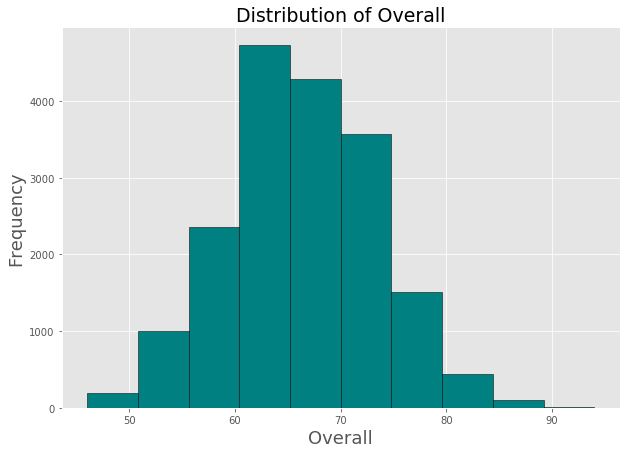

In [18]:
# Histogram (or Distribution plot)

plt.style.use('ggplot')

# Histogram of the Price
df.Overall.plot(kind='hist',color='teal',edgecolor='black',figsize=(10,7))
plt.title('Distribution of Overall', size=19)
plt.xlabel('Overall', size=18)
plt.ylabel('Frequency', size=18)

In this histogram above, we can see that it does not look like a Gaussian distribution, and also, that the most frequent overall is between 60 and 65. But let's make a Normality test to see if it's Gaussian or not.

### Normality Test for Overall

#### Shapiro-Wilk test of normality

In [19]:
# normality test
stat, p = shapiro(df.Overall)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.997, p=0.000
Sample does not look Gaussian (reject H0)


#### D’Agostino’s $K^2$ test of normality

In [20]:
# normality test
stat, p = normaltest(df.Overall)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=20.219, p=0.000
Sample does not look Gaussian (reject H0)


#### Anderson-Darling test of normality

In [21]:
# normality test
result = anderson(df.Overall)
print('Statistic: %.3f' % result.statistic)
p = 0

for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
    else:
        print('Alpha = %.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 20.531
Alpha = 15.000: 0.576, data does not look normal (reject H0)
Alpha = 10.000: 0.656, data does not look normal (reject H0)
Alpha = 5.000: 0.787, data does not look normal (reject H0)
Alpha = 2.500: 0.918, data does not look normal (reject H0)
Alpha = 1.000: 1.092, data does not look normal (reject H0)


As we could interpret in the three test of normality done, the sample does not look Gaussian.

### QQ plot

[Text(0.5, 1.0, 'Skewness')]

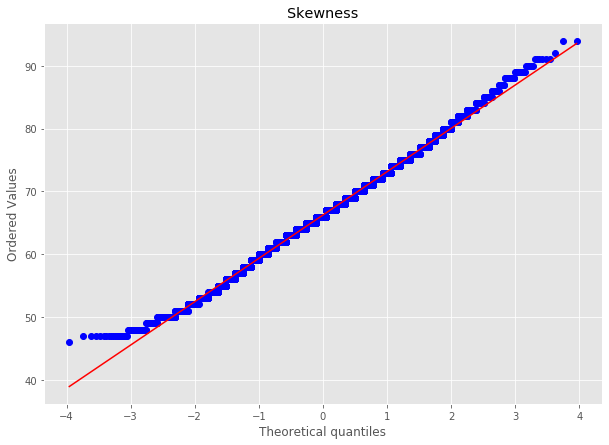

In [22]:
# QQ plot showing right skew and non-normality of very low overall rating (long right tail)
f, ax = plt.subplots(figsize =(10,7)) 
_ = stats.probplot(df['Overall'], plot=sns.mpl.pyplot)
ax.set(title='Skewness')

### Potential Histogram

Text(0, 0.5, 'Frequency')

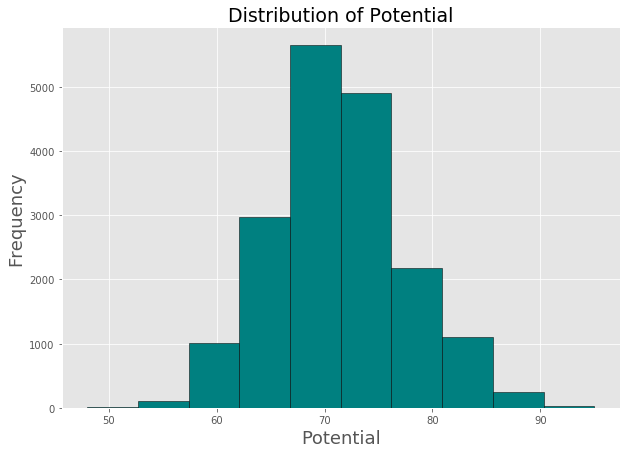

In [23]:
# Histogram (or Distribution plot)

plt.style.use('ggplot')

# Histogram of the Price
df.Potential.plot(kind='hist',color='teal',edgecolor='black',figsize=(10,7))
plt.title('Distribution of Potential', size=19)
plt.xlabel('Potential', size=18)
plt.ylabel('Frequency', size=18)

The Potential histogram is very similiar to the Overall distribution. Both seems to be not Gaussian, but let's make the normality test. The most frequent potencial is between 65 - 72.

### Normality Test for Potential

#### Shapiro-Wilk test of normality

In [24]:
# normality test
stat, p = shapiro(df.Potential)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.993, p=0.000
Sample does not look Gaussian (reject H0)


As we said before, and given the result of the Shapiro-Wilk test of normality, the sample of Potential is not Gaussian.

### Age Histogram

Text(0, 0.5, 'Frequency')

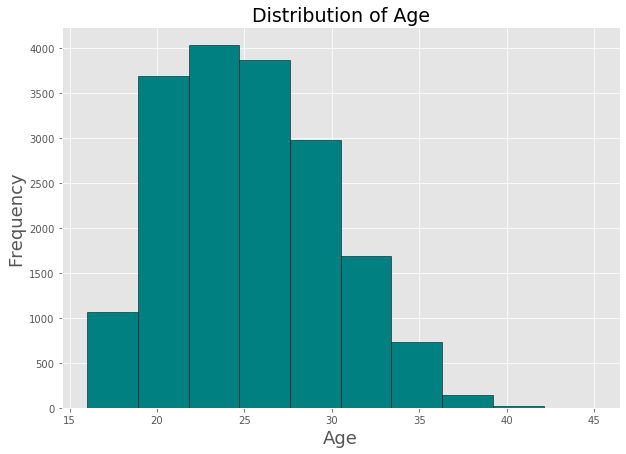

In [25]:
# Histogram (or Distribution plot)

plt.style.use('ggplot')

# Histogram of the Price
df.Age.plot(kind='hist',color='teal',edgecolor='black',figsize=(10,7))
plt.title('Distribution of Age', size=19)
plt.xlabel('Age', size=18)
plt.ylabel('Frequency', size=18)

This histogram shows that most of the players have between 23 - 28 years. Which means that most of the player are young.
Let's see the real mean, the min and the max age of this dataset.

In [26]:
print("Mean of age: ", round(df.Age.mean()))
print("Max age: ", df.Age.min())
print("Max age: ", df.Age.max())

Mean of age:  25.0
Max age:  16
Max age:  45


In [27]:
# Notice why the plot appears as above

df.Age.value_counts()

21    1423
26    1387
24    1358
22    1340
23    1332
25    1319
20    1240
27    1162
28    1101
19    1024
29     959
30     917
18     732
31     707
32     574
33     408
34     404
17     289
35     196
36     127
37      82
16      42
38      37
39      25
40      13
41       5
44       2
42       1
45       1
Name: Age, dtype: int64

### Skewness

[Text(0.5, 1.0, 'Skewness')]

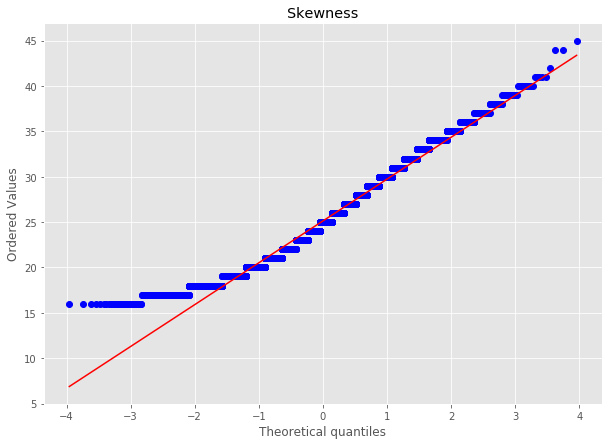

In [28]:
# QQ plot showing right skew and non-normality of very young players (long right tail)

f, ax = plt.subplots(figsize =(10,7)) 
_ = stats.probplot(df['Age'], plot=sns.mpl.pyplot)
ax.set(title='Skewness')

## Data Analysis and Visualization

As the first step of our analysis, we will see the player with the maximum potencial and the maximum overall performance.

In [29]:
# Player with maximum Potential and Overall Performance

print('Maximum Potential : ' + str(df.loc[df['Potential'].idxmax()][1]))
print('Maximum Overall Perforamnce : '+str(df.loc[df['Overall'].idxmax()][1]))

Maximum Potential : K. Mbappé
Maximum Overall Perforamnce : L. Messi


Let's see the most valued player of the dataset

In [30]:
print('Most valued player : '+str(df.loc[df['Value'].idxmax()][1]))

Most valued player : Neymar Jr


Now, let's analize each player observation.

In [31]:
print('K. Mbappé : \n')
df.loc[df['Name'] == 'K. Mbappé']

K. Mbappé : 



,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
25,231747,K. Mbappé,19,France,88,95,Paris Saint-Germain,81000000.0,100000.0,Right,...,86.0,34.0,34.0,32.0,13.0,5.0,7.0,11.0,6.0,€166.1M


In [32]:
print('L. Messi : \n')
df.loc[df['Name'] == 'L. Messi']

L. Messi : 



,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,565000.0,Left,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M


In [33]:
print('Neymar Jr : \n')
df.loc[df['Name'] == 'Neymar Jr']

Neymar Jr : 



,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,290000.0,Right,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M


Messi, Neymar and Mbappé have a high Overall and Potential rating, so this could be useful later on our analysis

Let's see the distribution of the players position.

### Distribution of player position

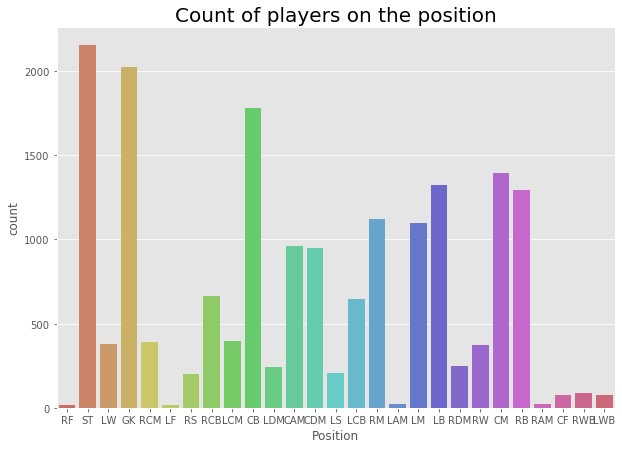

In [34]:
# All of position
f, ax = plt.subplots(figsize =(10,7)) 
ax = sns.countplot(x = 'Position', data = df, palette = 'hls');
ax.set_title(label='Count of players on the position', fontsize=20);

Most of the players on the dataset are STs (Strikers).

Now, we will display the best player per position

In [35]:
# The best player per position

display(HTML(df.iloc[df.groupby(df['Position'])['Overall'].idxmax()][['Name', 'Position']].to_html(index=False)))

Name,Position
A. Griezmann,CAM
D. Godín,CB
Sergio Busquets,CDM
Luis Alberto,CF
Thiago,CM
De Gea,GK
J. Rodríguez,LAM
Marcelo,LB
G. Chiellini,LCB
T. Kroos,LCM


## Corrlation

Correlation of the numerical values of the dataframe.

In [36]:
df = df.dropna()

[Text(0.5, 1, 'Correlation')]

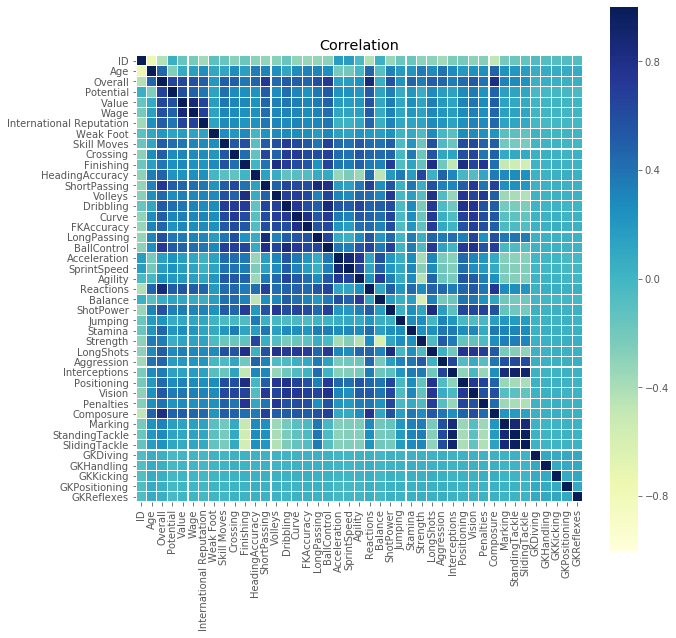

In [37]:
corrmat = df.corr() 

f, ax = plt.subplots(figsize =(10,10)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1, square=True, vmin=-1, vmax=1)
ax.set(title='Correlation')

In [38]:
print('Overall correlation with Composure: ',round(df.Overall.corr(df.Composure), 2))
print('Overall correlation with Reactions: ',round(df.Overall.corr(df.Reactions),2))
print('Overall correlation with Age: ',round(df.Overall.corr(df.Age),2))
print('Overall correlation with Potential: ',round(df.Overall.corr(df.Potential), 2))
print('Overall correlation with Value: ',round(df.Overall.corr(df.Value),2))
print('Overall correlation with Ball Control: ',round(df.Overall.corr(df.BallControl),2))
print('Overall correlation with Short Passing: ',round(df.Overall.corr(df.ShortPassing), 2))

Overall correlation with Composure:  0.81
Overall correlation with Reactions:  0.85
Overall correlation with Age:  0.46
Overall correlation with Potential:  0.65
Overall correlation with Value:  0.64
Overall correlation with Ball Control:  0.72
Overall correlation with Short Passing:  0.73


In the correlation heatmap we can see that Overall is highly correlated with Ball Control, Potential, Value, Composure, Age and Reactions. So those features could be our candidates to be independent variables. But we will choose only the best 4 or 5 of them.

## Initial exploration

### Linear relationhips

#### Composure vs Overall

Text(0, 0.5, 'Overall')

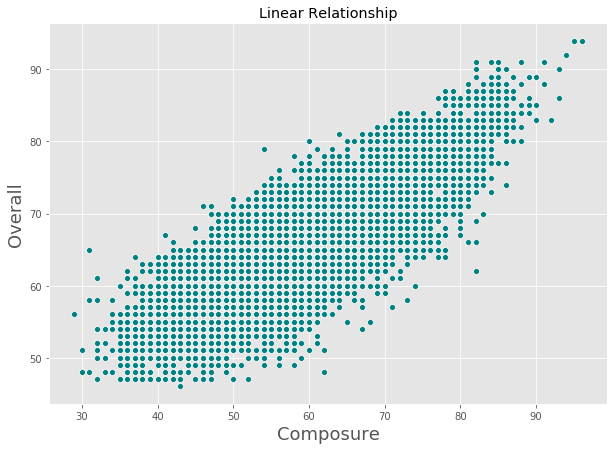

In [39]:
f, ax = plt.subplots(figsize =(10,7))
sns.scatterplot(x=df.Composure.values, y=df.Overall.values, color='teal')
ax.set(title='Linear Relationship')
plt.xlabel('Composure', size=18)
plt.ylabel('Overall', size=18)

#### Age vs Overall

Text(0, 0.5, 'Overall')

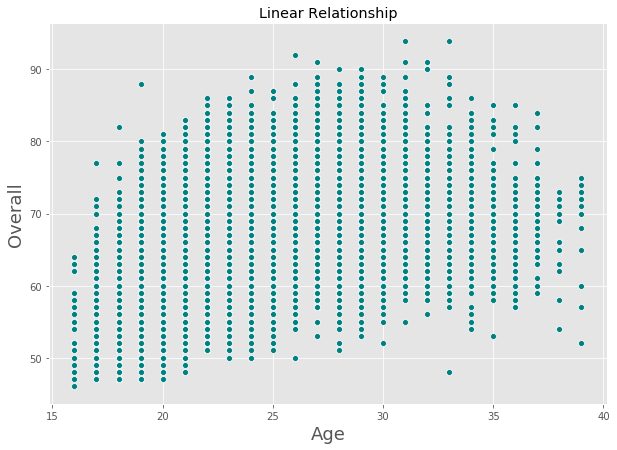

In [40]:
f, ax = plt.subplots(figsize =(10,7))
sns.scatterplot(x=df.Age.values, y=df.Overall.values, color='teal')
ax.set(title='Linear Relationship')
plt.xlabel('Age', size=18)
plt.ylabel('Overall', size=18)

#### Reactions vs Overall

Text(0, 0.5, 'Overall')

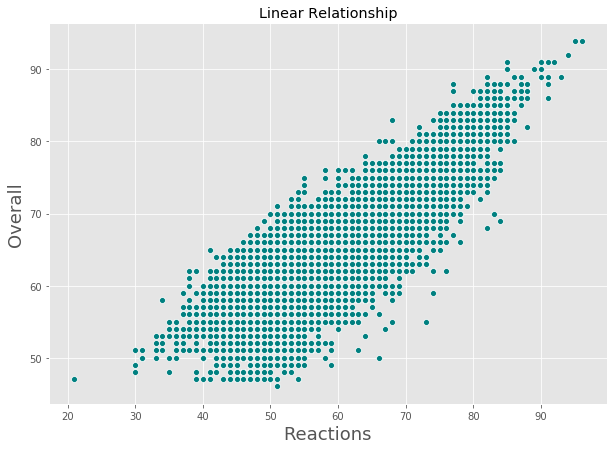

In [41]:
f, ax = plt.subplots(figsize =(10,7))
sns.scatterplot(x=df.Reactions.values, y=df.Overall.values, color='teal')
ax.set(title='Linear Relationship')
plt.xlabel('Reactions', size=18)
plt.ylabel('Overall', size=18)

#### Potential vs Overall

Text(0, 0.5, 'Overall')

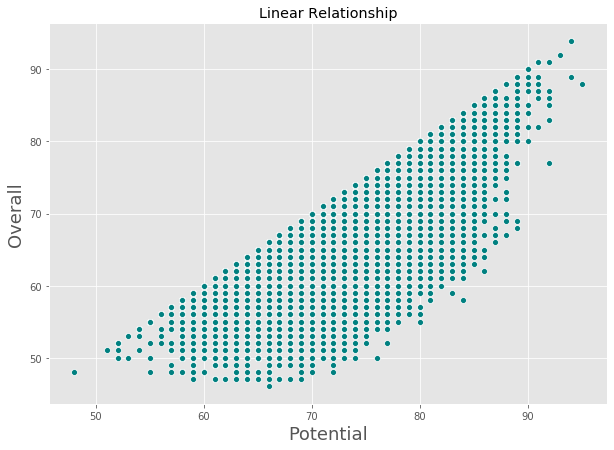

In [42]:
f, ax = plt.subplots(figsize =(10,7))
sns.scatterplot(x=df.Potential.values, y=df.Overall.values, color='teal')
ax.set(title='Linear Relationship')
plt.xlabel('Potential', size=18)
plt.ylabel('Overall', size=18)

#### Value vs Overall

Text(0, 0.5, 'Overall')

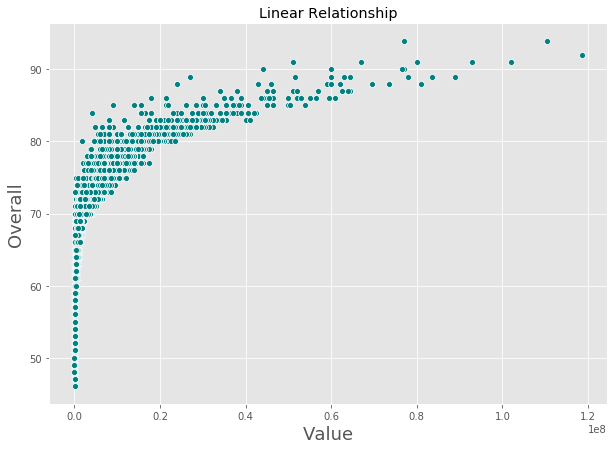

In [43]:
f, ax = plt.subplots(figsize =(10,7))
sns.scatterplot(x=df.Value.values, y=df.Overall.values, color='teal')
ax.set(title='Linear Relationship')
plt.xlabel('Value', size=18)
plt.ylabel('Overall', size=18)

#### Ball Control vs Overall

Text(0, 0.5, 'Overall')

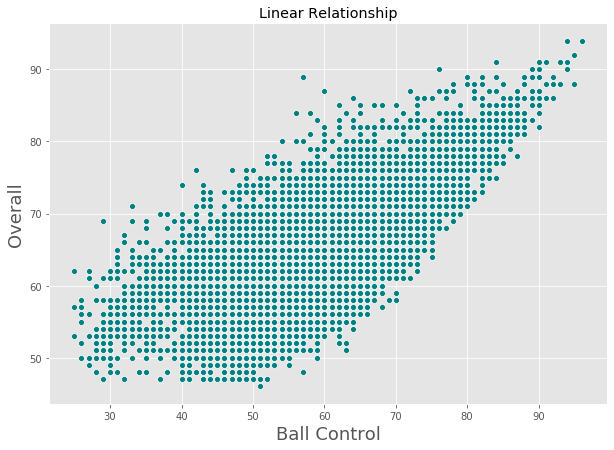

In [44]:
f, ax = plt.subplots(figsize =(10,7))
sns.scatterplot(x=df.BallControl.values, y=df.Overall.values, color='teal')
ax.set(title='Linear Relationship')
plt.xlabel('Ball Control', size=18)
plt.ylabel('Overall', size=18)

#### Short Passing vs Overall

Text(0, 0.5, 'Overall')

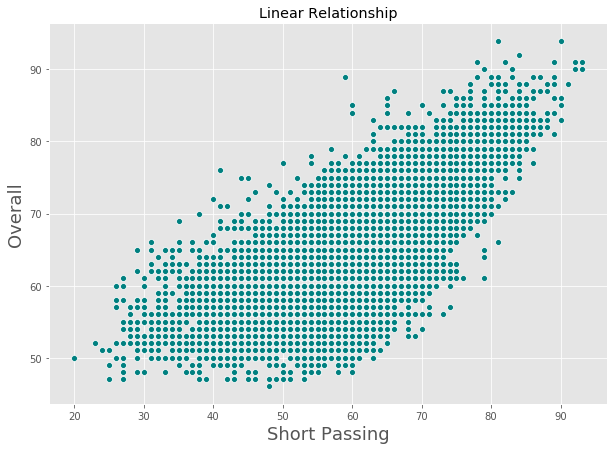

In [45]:
f, ax = plt.subplots(figsize =(10,7))
sns.scatterplot(x=df.ShortPassing.values, y=df.Overall.values, color='teal')
ax.set(title='Linear Relationship')
plt.xlabel('Short Passing', size=18)
plt.ylabel('Overall', size=18)

As we can see in the Scatter plots above, almost all the independent variables have a linear relationship with Overall, exept the Value and the Age features. 

### Linear Regression

Now that we have seen the Linear Relationship with the Overall feature, we can choose the best/higher features that will be our independent variables for our Linear Regression.

Our independent Variables are:

   1. Composure
   2. Reactions
   3. Ball Control
   4. Potencial
   5. Age
   
Our Dependent Variable is:

    1.Overall

Let's make some Linear Regression with each independent variable, so we can see the relationship with the Overall feature.

#### Composure vs Overall

##### Preparing our data

In [46]:
X_train, X_test, y_train, y_test = train_test_split(df.Composure.values, df.Overall.values, test_size=0.20, random_state=42)

In [47]:
# Add one dim to our data, so it can be computed

X_train = np.expand_dims(X_train, axis=1)
y_train = np.expand_dims(y_train, axis=1)
X_test = np.expand_dims(X_test, axis=1)
y_test = np.expand_dims(y_test, axis=1)

In [48]:
# get the shape

X_train.shape

(11794, 1)

In [49]:
y_train.shape

(11794, 1)

In [50]:
X_test.shape

(2949, 1)

In [51]:
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
#print(model.score(X_test, y_test))

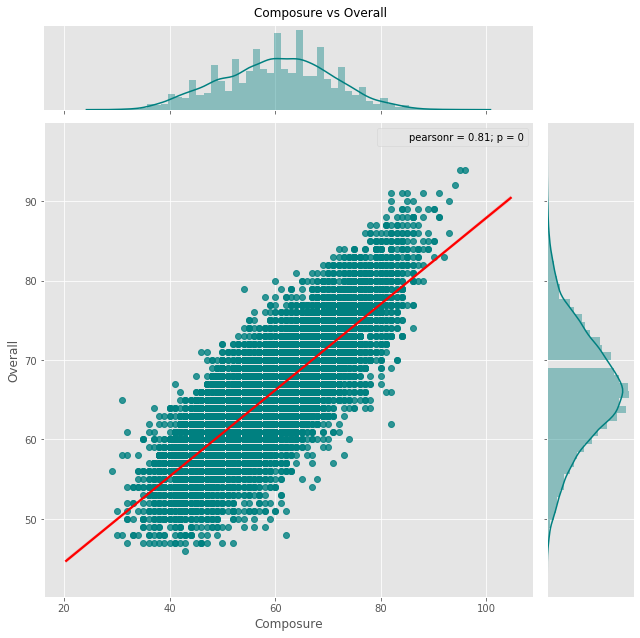

In [52]:
g = sns.jointplot(x=df.Composure.values, y=df.Overall.values, color='teal', height = 9, kind='reg', 
                 joint_kws={'line_kws':{'color':'red'}}) 

 # Add pearson stat
g.annotate(stats.pearsonr)

# Set axis labels
g.set_axis_labels("Composure", "Overall")

# Set title
g.fig.suptitle("Composure vs Overall")

# Format nicely.
g.fig.tight_layout()

# Reduce plot to make room for suptitle
g.fig.subplots_adjust(top=0.95)

In [53]:
r_squared = r2_score(y_test, predictions)
n = X_train.shape[0]
p = X_train.shape[1]
rsqrt = 1 - ((1 - r_squared) * ((n - 1) / (n - p - 1))) # r^2 adjusted equation
print('r2 score: '+str(r2_score(y_test, predictions)))
print('adj. r2 score: ', rsqrt)
print('RMSE : '+str(np.sqrt(mean_squared_error(y_test, predictions))))

r2 score: 0.6508545338171399
adj. r2 score:  0.6508249251446345
RMSE : 4.083774788292482


#### Linear regression with lasso

In [54]:
# Lasso regression model with alpha = 10 (some penalty)
lasso_model_10 = Lasso(alpha=10, fit_intercept=True)
lasso_model_10.fit(X_train, y_train)
print('r2 score: ',lasso_model_10.score(X_test, y_test))

r2 score:  0.6299002874953071


#### Ridge regression

In [55]:
# Ridge regression with high penalty
ridge_model = Ridge(alpha=1000, fit_intercept=True)
ridge_model.fit(X_train, y_train)
ridge_pred = ridge_model.predict(X_test)
print('r2 score: ',ridge_model.score(X_test, y_test))

r2 score:  0.6508502195515824


As we can see, the Linear regression with some penalty is worst that the simple linear regression. In the other hand, the ridge regression is almost the same $r^2$ score.

#### Reactions vs Overall

##### Preparing our data

In [56]:
X_train, X_test, y_train, y_test = train_test_split(df.Reactions.values, df.Overall.values, test_size=0.20, random_state=42)

In [57]:
X_train = np.expand_dims(X_train, axis=1)
y_train = np.expand_dims(y_train, axis=1)
X_test = np.expand_dims(X_test, axis=1)
y_test = np.expand_dims(y_test, axis=1)

In [58]:
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

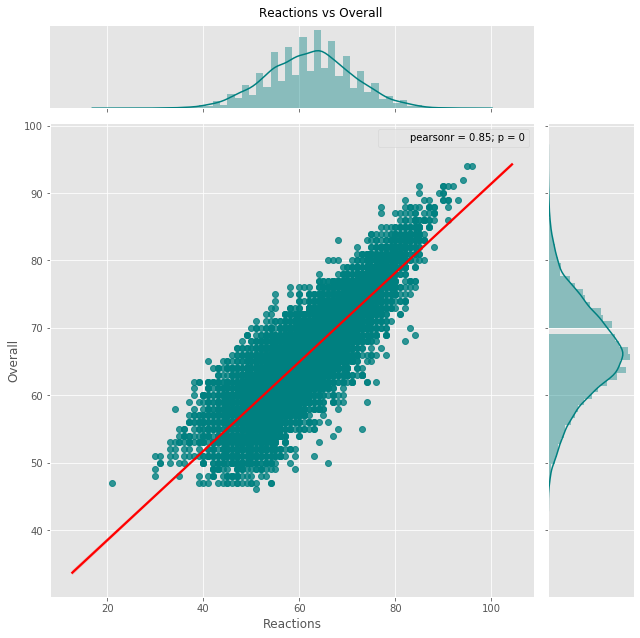

In [59]:
g = sns.jointplot(x=df.Reactions.values, y=df.Overall.values, color='teal', height = 9, kind='reg', 
                 joint_kws={'line_kws':{'color':'red'}}) 

 # Add pearson stat
g.annotate(stats.pearsonr)

# Set axis labels
g.set_axis_labels("Reactions", "Overall")

# Set title
g.fig.suptitle("Reactions vs Overall")

# Format nicely.
g.fig.tight_layout()

# Reduce plot to make room for suptitle
g.fig.subplots_adjust(top=0.95)

In [60]:
r_squared = r2_score(y_test, predictions)
n = X_train.shape[0]
p = X_train.shape[1]
rsqrt = 1 - ((1 - r_squared) * ((n - 1) / (n - p - 1))) # r^2 adjusted equation
print('r2 score: '+str(r2_score(y_test, predictions)))
print('adj. r2 score: ', rsqrt)
print('RMSE : '+str(np.sqrt(mean_squared_error(y_test, predictions))))

r2 score: 0.7248939869859463
adj. r2 score:  0.7248706571001751
RMSE : 3.6250050977001176


#### Ball Control vs Overall

##### Preparing our data

In [61]:
X_train, X_test, y_train, y_test = train_test_split(df.BallControl.values, df.Overall.values, test_size=0.20, random_state=42)

In [62]:
X_train = np.expand_dims(X_train, axis=1)
y_train = np.expand_dims(y_train, axis=1)
X_test = np.expand_dims(X_test, axis=1)
y_test = np.expand_dims(y_test, axis=1)

In [63]:
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

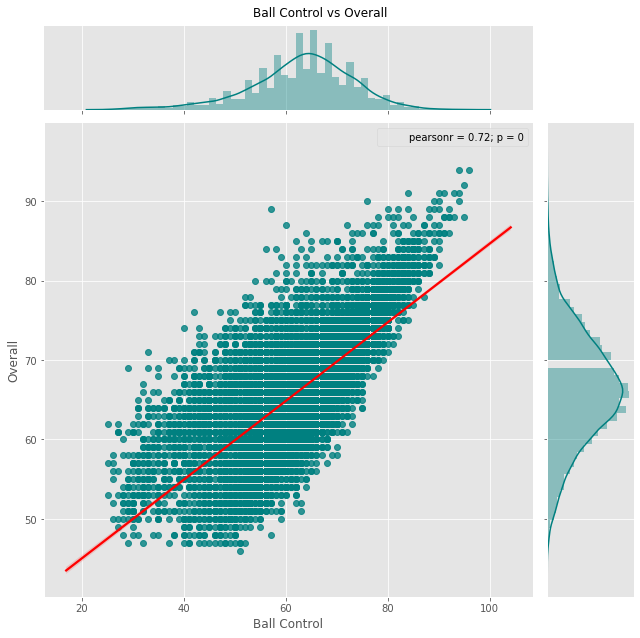

In [64]:
g = sns.jointplot(x=df.BallControl.values, y=df.Overall.values, color='teal', height = 9, kind='reg', 
                 joint_kws={'line_kws':{'color':'red'}})

 # Add pearson stat
g.annotate(stats.pearsonr)

# Set axis labels
g.set_axis_labels("Ball Control", "Overall")

# Set title
g.fig.suptitle("Ball Control vs Overall")

# Format nicely.
g.fig.tight_layout()

# Reduce plot to make room for suptitle
g.fig.subplots_adjust(top=0.95)

In [65]:
r_squared = r2_score(y_test, predictions)
n = X_train.shape[0]
p = X_train.shape[1]
rsqrt = 1 - ((1 - r_squared) * ((n - 1) / (n - p - 1))) 
print('r2 score: '+str(r2_score(y_test, predictions)))
print('adj. r2 score: ', rsqrt)
print('RMSE : '+str(np.sqrt(mean_squared_error(y_test, predictions))))

r2 score: 0.5261378426292007
adj. r2 score:  0.5260976575751496
RMSE : 4.7575635027676535


#### Linear regression with lasso

In [66]:
# Lasso regression model with alpha = 10 (some penalty)
lasso_model_10 = Lasso(alpha=10, fit_intercept=True)
lasso_model_10.fit(X_train, y_train)
print('r2 score: ',lasso_model_10.score(X_test, y_test))

r2 score:  0.5048456846983267


#### Ridge regression

In [67]:
# Ridge regression with high penalty
ridge_model = Ridge(alpha=1000, fit_intercept=True)
ridge_model.fit(X_train, y_train)
ridge_pred = ridge_model.predict(X_test)
print('r2 score: ',ridge_model.score(X_test, y_test))

r2 score:  0.5261375453264796


The same as the previous model, the Lasso function just get worst, and the Ridge regression get a lower value of $r^2$, but, the RMSE is reduced.

#### Potential vs Overall

##### Preparing our data

In [68]:
X_train, X_test, y_train, y_test = train_test_split(df.Potential.values, df.Overall.values, test_size=0.20, random_state=42)

In [69]:
X_train = np.expand_dims(X_train, axis=1)
y_train = np.expand_dims(y_train, axis=1)
X_test = np.expand_dims(X_test, axis=1)
y_test = np.expand_dims(y_test, axis=1)

In [70]:
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

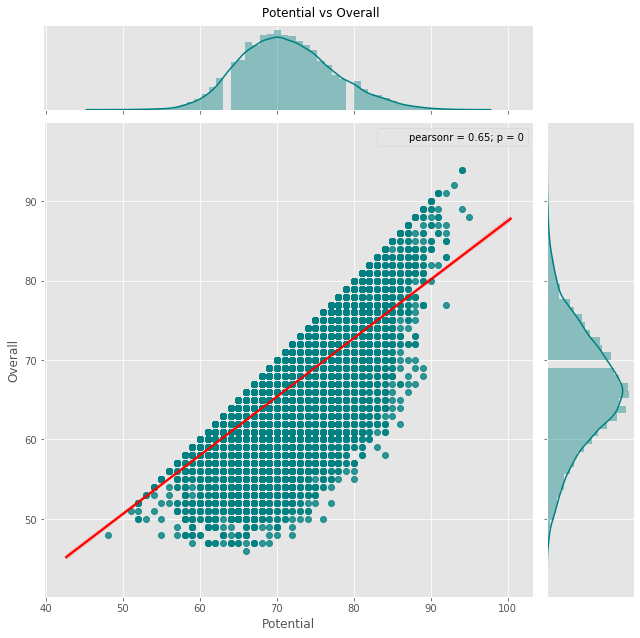

In [71]:
g = sns.jointplot(x=df.Potential.values, y=df.Overall.values, color='teal', height = 9, kind='reg', 
                 joint_kws={'line_kws':{'color':'red'}}) # Only regression red))

 # Add pearson stat
g.annotate(stats.pearsonr)

# Set axis labels
g.set_axis_labels("Potential", "Overall")

# Set title
g.fig.suptitle("Potential vs Overall")

# Format nicely.
g.fig.tight_layout()

# Reduce plot to make room for suptitle
g.fig.subplots_adjust(top=0.95)

In [72]:
r_squared = r2_score(y_test, predictions)
n = X_train.shape[0]
p = X_train.shape[1]
rsqrt = 1 - ((1 - r_squared) * ((n - 1) / (n - p - 1))) 
print('r2 score: '+str(r2_score(y_test, predictions)))
print('adj. r2 score: ', rsqrt)
print('RMSE : '+str(np.sqrt(mean_squared_error(y_test, predictions))))

r2 score: 0.44862585337764715
adj. r2 score:  0.4485790950544939
RMSE : 5.131942473366308


#### Age vs Overall

##### Preparing our data

In [73]:
X_train, X_test, y_train, y_test = train_test_split(df.Age.values, df.Overall.values, test_size=0.20, random_state=42)

In [74]:
X_train = np.expand_dims(X_train, axis=1)
y_train = np.expand_dims(y_train, axis=1)
X_test = np.expand_dims(X_test, axis=1)
y_test = np.expand_dims(y_test, axis=1)

In [75]:
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

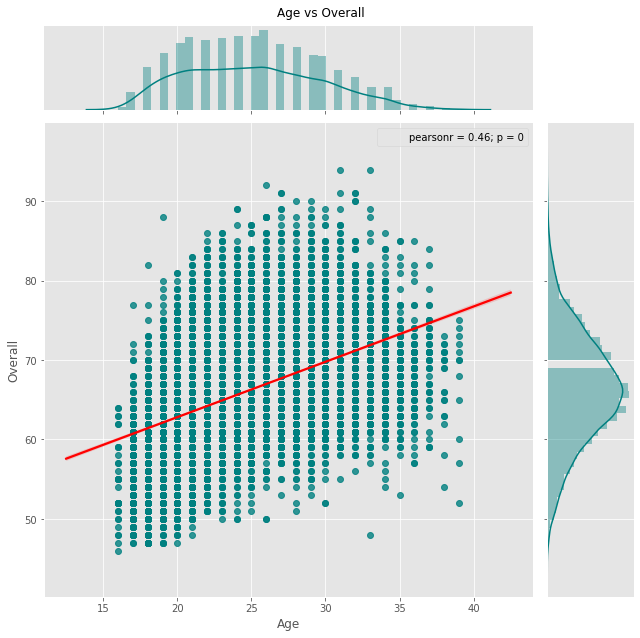

In [76]:
g = sns.jointplot(x=df.Age.values, y=df.Overall.values, color='teal', height = 9, kind='reg', 
                  joint_kws={'line_kws':{'color':'red'}})

 # Add pearson stat
g.annotate(stats.pearsonr)

# Set axis labels
g.set_axis_labels("Age", "Overall")

# Set title
g.fig.suptitle("Age vs Overall")

# Format nicely.
g.fig.tight_layout()

# Reduce plot to make room for suptitle
g.fig.subplots_adjust(top=0.95)

In [77]:
r_squared = r2_score(y_test, predictions)
n = X_train.shape[0]
p = X_train.shape[1]
rsqrt = 1 - ((1 - r_squared) * ((n - 1) / (n - p - 1))) 
print('r2 score: '+str(r2_score(y_test, predictions)))
print('adj. r2 score: ', rsqrt)
print('RMSE : '+str(np.sqrt(mean_squared_error(y_test, predictions))))

r2 score: 0.19134095534583917
adj. r2 score:  0.1912723784254987
RMSE : 6.215002452891501


This model is not good enough to explain the variation of the data and the variable we are looking for, so we will try to make the prediction better withh a polynomial regression.

#### Polynomial Regression

In [78]:
# Create polynomial regression features of nth degree
poly_reg = PolynomialFeatures(degree = 3)
X_poly_train = poly_reg.fit_transform(pd.DataFrame(X_train))
X_poly_test = poly_reg.fit_transform(pd.DataFrame(X_test))

# poly_result = poly_reg.fit(X_train_final, y_train)

# Fit linear model now polynomial features
poly_model = LinearRegression()
poly_result = poly_model.fit(X_poly_train, y_train)
y_poly_pred = poly_model.predict(X_poly_test)

Text(0.5, 1.0, 'Age VS Overall')

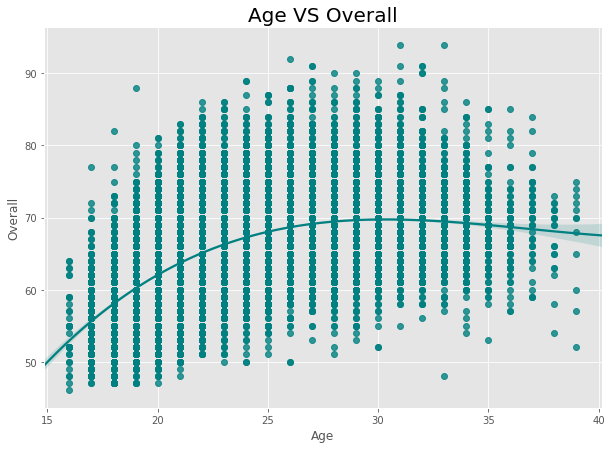

In [79]:
plt.figure(figsize = (10,7))
sns.regplot(x="Age", y="Overall", color = 'teal', order = 3,data=df);
plt.title('Age VS Overall',size = 20)

In [80]:
print('r2 score: '+str(r2_score(y_test, y_poly_pred)))

r2 score: 0.2660547157342946


As we can see , the $r^2$ of the polynomial regression with a polynomial degree (order) of 3, is 0.26, it seems te be better but the difference betweeen the two models is 0.08, wich is not good either.  

Let's try with Lasso and Ridge penalty functions.

#### Linear regression with lasso

In [81]:
# Lasso regression model with alpha = 10 (some penalty)
lasso_model_10 = Lasso(alpha=10, fit_intercept=True)
lasso_model_10.fit(X_poly_train, y_train)
print('r2 score: ',lasso_model_10.score(X_poly_test, y_test))

r2 score:  0.2547806002764793


#### Ridge regression

In [82]:
# Ridge regression with high penalty
ridge_model = Ridge(alpha=1000, fit_intercept=True)
ridge_model.fit(X_poly_train, y_train)
ridge_pred = ridge_model.predict(X_poly_test)
print('r2 score: ',ridge_model.score(X_poly_test, y_test))

r2 score:  0.261632340130286


### Multi Linear Regression

Let's concatenate our independent variables...

In [83]:
names = ['Composure', 'Reactions', 'BallControl', 'Potential', 'Age']
x_multi = df[names]

x_multi.head()

,Composure,Reactions,BallControl,Potential,Age
0,96.0,95.0,96.0,94,31
1,95.0,96.0,94.0,94,33
2,94.0,94.0,95.0,93,26
4,88.0,91.0,91.0,92,27
5,91.0,90.0,94.0,91,27


Now that we have our multiple x's, we will prepare the data to be computed...

##### Preparing our data

In [84]:
X_train, X_test, y_train, y_test = train_test_split(x_multi, df.Overall, test_size=0.20, random_state=42)

In [85]:
print(X_test.shape,X_train.shape)
print(y_test.shape,y_train.shape)

(2949, 5) (11794, 5)
(2949,) (11794,)


In [86]:
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
result= model.fit(X_train, y_train)

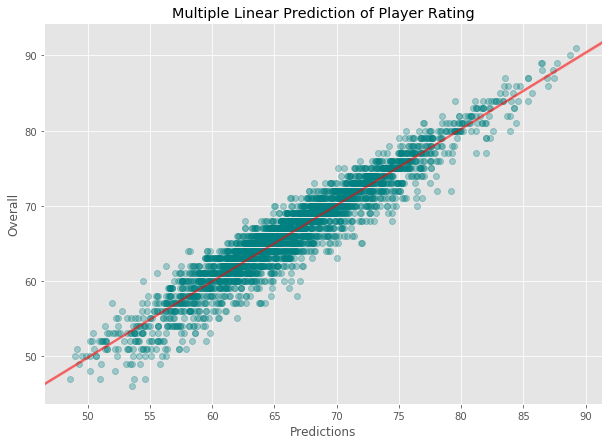

In [87]:
#Visualising the results

plt.figure(figsize=(10,7))
sns.regplot(predictions,y_test,scatter_kws={'alpha':0.3,'color':'teal'},line_kws={'color':'red','alpha':0.5})
plt.xlabel('Predictions')
plt.ylabel('Overall')
plt.title("Multiple Linear Prediction of Player Rating")
plt.show()

In [88]:
r_squared = r2_score(y_test, predictions)
n = X_train.shape[0]
p = X_train.shape[1]
rsqrt = 1 - ((1 - r_squared) * ((n - 1) / (n - p - 1))) 
print('r2 score: '+str(r2_score(y_test, predictions)))
print('adj. r2 score: ', rsqrt)
print('RMSE : '+str(np.sqrt(mean_squared_error(y_test, predictions))))

r2 score: 0.9104435589067059
adj. r2 score:  0.910405572632065
RMSE : 2.0682688614609885


#### Linear regression with lasso

In [89]:
# Lasso regression model with alpha = 10 (some penalty)
lasso_model_10 = Lasso(alpha=10, fit_intercept=True)
lasso_model_10.fit(X_train, y_train)
print('r2 score: ',lasso_model_10.score(X_test, y_test))

r2 score:  0.783158507496842


#### Ridge regression

In [90]:
# Ridge regression with high penalty
ridge_model = Ridge(alpha=1000, fit_intercept=True)
ridge_model.fit(X_train, y_train)
ridge_pred = ridge_model.predict(X_test)
print('r2 score: ',ridge_model.score(X_test, y_test))

r2 score:  0.9102955335681003


## Conclusion

Given the results of the models above, we can say that the mutiple lineal regression is by far,the best model to predict the overall rating for a player. The age, the potential, the ball control, the reaction and the composure are the most influent variables to make this relationhip. And, in the other hand, penalty functions only use when needed, or when we want to get a lower RMSE in our model. 